## Free data sets (examples)

1. Based on the descriptions at the pages of data providers explain what each data set means.
2. Select two data sets, and compare their changes at times when something happened in the world.
3. Note: the word `spread` means `difference`.

| Source | Name, Link to page | Type | Further information |
| :--- | :--| :--- | :-- |
|[Yahoo Finance](https://finance.yahoo.com) | [S&P500 stock market index](https://finance.yahoo.com/quote/%5EGSPC) | Equity index | US Large cap stocks |
| &nbsp; | [Walmart](https://finance.yahoo.com/quote/WMT) | Equity | Retail, Large capitalization |
| &nbsp; | [Amazon](https://finance.yahoo.com/quote/AMZN) | Equity | IT, Big cap |
| &nbsp; | [Tesla](https://finance.yahoo.com/quote/TSLA) | Equity | Tech / Cars, Big cap |
| &nbsp; | [BJ's Restaurants Inc.](https://finance.yahoo.com/quote/BJRI) | Equity | Catering industry, Small cap |
| &nbsp; | [Bitcoin](https://finance.yahoo.com/quote/BTC-USD) | FX |  Payments / Investment | 
| &nbsp; | [Ethereum](https://finance.yahoo.com/quote/ETH-USD) | FX | also infrastructural | 
| &nbsp; | [Ounce of gold in USD](https://finance.yahoo.com/quote/GC=F) | Commodity | Gold: bullion |
| &nbsp; | [YEN / USD exchange rate](https://finance.yahoo.com/quote/JPYUSD=X) | FX | &nbsp; | 
| &nbsp; | [EUR / USD exchange rate](https://finance.yahoo.com/quote/EUR=X) | FX | &nbsp; |
| &nbsp; | [Vanguard real estate index](https://finance.yahoo.com/quote/VNQ) | Real Estate Index| &nbsp; |
| &nbsp; | [OTP](https://finance.yahoo.com/quote/OTP.BP) | Equity | Banking, Regional |
| &nbsp; | [MOL](https://finance.yahoo.com/quote/MOL.BP) | Equity | Energy, Regional |
| &nbsp; | [Telekom HU](https://finance.yahoo.com/quote/MTELEKOM.BP) | Equity | Telco, subsidiary of Deutsche Telekom |
| &nbsp; | [Richter](https://finance.yahoo.com/quote/RICHTER.BP) | Equity | Pharma, Regional |
| [FRED](https://fred.stlouisfed.org) | [Moody's AAA 10Y credit spread](https://fred.stlouisfed.org/series/AAA10Y) | AAA Corp Bond vs 10Y Treasury  | Spread to 10Y T-bond |

### Download

Please download data to the `data` subfolder of your current local directory.

#### Yahoo data sets: Download with yfinance

In [90]:
# show/hide code block

from pathlib import Path
import pandas as pd
import re
import yfinance as yf
import time

YAHOO_TICKERS = ['^GSPC', 'WMT', 'AMZN', 'TSLA', 'MSFT', 'NVDA', 'BJRI', 'BTC-USD', 'ETH-USD',
                 'GC=F', 'JPYUSD=X', 'EUR=X', 'VNQ',
                'OTP.BD', 'MOL.BD', 'MTELEKOM.BD', 'RICHTER.BD']

for ticker in YAHOO_TICKERS:
    local_csv_file_path = Path('data') / f'{ticker}.csv'
    if local_csv_file_path.exists():
        print(f'Local file is available: {local_csv_file_path}')
    else:
        time.sleep(5)
        data = yf.download(tickers=ticker, period='max')
        data.to_csv(local_csv_file_path)
        print(f'Downloaded data and saved to local file: {local_csv_file_path}')

Local file is available: data\^GSPC.csv
Local file is available: data\WMT.csv
Local file is available: data\AMZN.csv
Local file is available: data\TSLA.csv
Local file is available: data\MSFT.csv
Local file is available: data\NVDA.csv
Local file is available: data\BJRI.csv
Local file is available: data\BTC-USD.csv
Local file is available: data\ETH-USD.csv
Local file is available: data\GC=F.csv
Local file is available: data\JPYUSD=X.csv
Local file is available: data\EUR=X.csv
Local file is available: data\VNQ.csv
Local file is available: data\OTP.BD.csv
Local file is available: data\MOL.BD.csv
Local file is available: data\MTELEKOM.BD.csv
Local file is available: data\RICHTER.BD.csv


#### FRED data: Download manually
At https://fred.stlouisfed.org/series/AAA10Y 
* select frequency `max`
* click `Download` in the top right corner
* and then select `CSV`

## Read data. Daily closing price and traded volume.

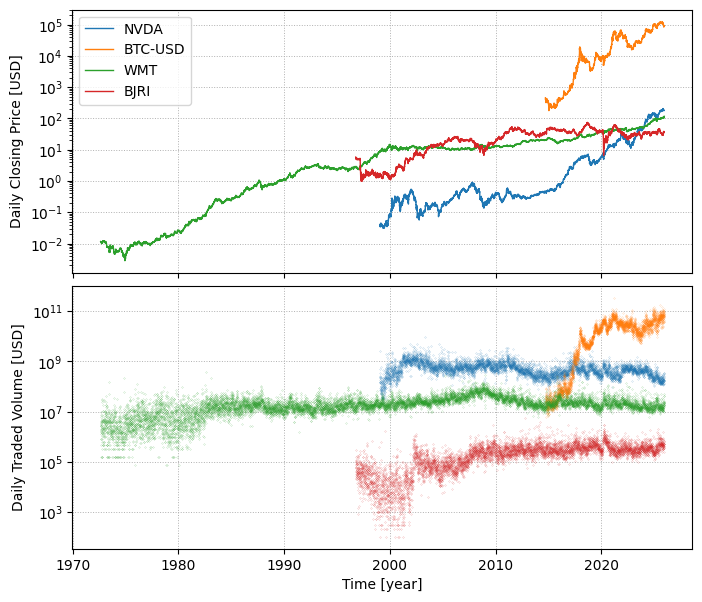

In [91]:
# show/hide code block

import pandas as pd
from matplotlib import gridspec, pyplot as plt
import os
import numpy as np
from pathlib import Path

# List of currently available files
TICKERS = ['^GSPC', 'WMT', 'AMZN', 'TSLA', 'NVDA', 'BJRI', 'BTC-USD', 'ETH-USD', 'GC=F', 'VNQ', 'MSFT',
           'OTP.BD', 'MOL.BD', 'MTELEKOM.BD', 'RICHTER.BD']
TICKERS_SAMPLE = ['NVDA', 'BTC-USD', 'WMT', 'BJRI']

DATA_FOLDER = 'data'
USD_HUF = 328

data = dict()  # Data for a ticker
for ticker in TICKERS:

    # --- Read csv to dataframe ---
    df = pd.read_csv(str(Path(DATA_FOLDER) / f'{ticker}.csv'))

    # formatting
    df = df.drop(df.index[[0, 1]])
    df = df.rename(columns={'Price': 'Date'})

    # select columns and set their types 
    df = df[['Date', 'Close', 'Volume']]
    df.Date = pd.to_datetime(df.Date)
    df.Close = pd.to_numeric(df.Close, errors='coerce')
    df.Volume = pd.to_numeric(df.Volume, errors='coerce')

    # Convert HUF to USD
    if ticker.endswith('.BD'):
        df.Close /= USD_HUF
        df.Volume /= USD_HUF

    df.index = df.Date
    data[ticker] = df.dropna()

# --- Create a figure. Define a 2 rows x 1 column grid ---
fig_price_volume = plt.figure(figsize=(8, 7))
gs = gridspec.GridSpec(2, 1, figure=fig_price_volume)

# --- Daily Closing Price ---
ax_price = fig_price_volume.add_subplot(gs[0, 0])
for ticker in TICKERS_SAMPLE:
    ax_price.plot(data[ticker].Date, data[ticker].Close, '-', lw=1, label=ticker, zorder=2)
ax_price.set_yscale('log')
ax_price.set(xlabel='Time [year]', ylabel='Daily Closing Price [USD]')
ax_price.grid(linestyle=':', linewidth=0.7, zorder=1)
ax_price.label_outer()
ax_price.legend(loc='upper left')

# --- Daily Traded Volume ---
ax_volume = fig_price_volume.add_subplot(gs[1, 0])
for ticker in TICKERS_SAMPLE:
    ax_volume.plot(data[ticker].Date, data[ticker].Volume, '.', markersize=0.2, label=ticker, zorder=2)
ax_volume.set_yscale('log')
ax_volume.set(xlabel='Time [year]', ylabel='Daily Traded Volume [USD]')
ax_volume.grid(linestyle=':', linewidth=0.7, zorder=1)

# --- Finalize the plot ---      
plt.subplots_adjust(hspace=0.05) # Set spacing between subplots
plt.show()  # Display the plot directly

## Daily and Monthly log returns

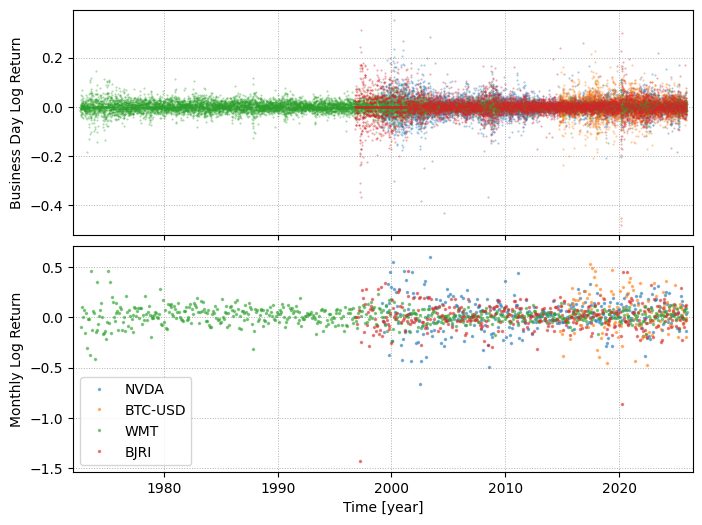

In [92]:
# show/hide code block

import datetime


def get_last_date_in_each_month(series_of_dates):
    """
    From a series_of_dates get the list_of_last_dates_in_each_month
    """
    list_of_last_dates_in_each_month = []
    groupby_years = series_of_dates.groupby(pd.to_datetime(series_of_dates).dt.year)
    for year, series_of_dates_for_year in groupby_years:
        groupby_months_of_year = series_of_dates_for_year.groupby(series_of_dates_for_year.dt.month)
        for month, group_of_month in groupby_months_of_year:
            list_of_last_dates_in_each_month.append(max(group_of_month))

    return list_of_last_dates_in_each_month


def set_daily_and_monthly_log_returns(_data):
    """
    Input:
        yfinance dataframes by ticker

    Output:
        in each df writing daily_log_return and monthly_log_return
    """
    daily_log_returns = dict()
    monthly_log_returns = dict()

    for ticker, df in _data.items():

        daily_log_returns[ticker] = np.log(df.Close) - np.log(df.Close.shift())
        daily_log_returns[ticker].index = df.Date
        df['daily_log_return'] = daily_log_returns[ticker].dropna()

        last_date_of_each_month = get_last_date_in_each_month(df.Date)
        df_month_last_dates = df.loc[last_date_of_each_month]
        monthly_log_returns[ticker] = np.log(df_month_last_dates.Close) - np.log(df_month_last_dates.Close.shift())
        monthly_log_returns[ticker].index = df_month_last_dates.Date
        df['monthly_log_return'] = monthly_log_returns[ticker].dropna()


def plot_log_returns(_data, tickers_selected):

    # --- Create a figure. Define a 2 rows x 1 column grid ---
    fig_daily_monthly = plt.figure(figsize=(8, 6))
    gs = gridspec.GridSpec(2, 1, figure=fig_daily_monthly)

    # --- plot daily log returns ---
    ax_daily = fig_daily_monthly.add_subplot(gs[0, 0])
    for ticker in tickers_selected:
        ax_daily.plot(data[ticker]['daily_log_return'], marker='.', ms=1, alpha=0.4, label=ticker, lw=0, zorder=2)
    ax_daily.set_yscale('linear')
    ax_daily.set(xlabel='Time [year]', ylabel='Business Day Log Return')
    ax_daily.set_xlim([datetime.date(1972, 1, 1), datetime.date(2026, 6, 30)])
    ax_daily.label_outer()
    ax_daily.grid(linestyle=':', linewidth=0.7, zorder=1)
    
    # --- plot monthly log returns ---
    ax_monthly = fig_daily_monthly.add_subplot(gs[1, 0])
    for ticker in tickers_selected:
        ax_monthly.plot(data[ticker]['monthly_log_return'], marker='.', ms=3, alpha=0.5, label=ticker, lw=0, zorder=2)
    ax_monthly.set_yscale('linear')
    ax_monthly.set(xlabel='Time [year]', ylabel='Monthly Log Return')
    ax_monthly.set_xlim([datetime.date(1972, 1, 1), datetime.date(2026, 6, 30)])
    ax_monthly.grid(linestyle=':', linewidth=0.7, zorder=1)
    ax_monthly.legend(loc='lower left')

    # --- finalize the plot ---         
    plt.subplots_adjust(hspace=0.05)
    plt.show()

# --- main ---
set_daily_and_monthly_log_returns(data)
plot_log_returns(data, tickers_selected=TICKERS_SAMPLE)

## QQ plot: Log return CDF vs Normal fit CDF

$(1)\,\,$ On which time scale (daily or monthly) is BTC-USD's log return CDF closer to the CDF of the normal fit ?

$(2)\,\,$ Can you find any data errors, for example, cutoff around zero ?

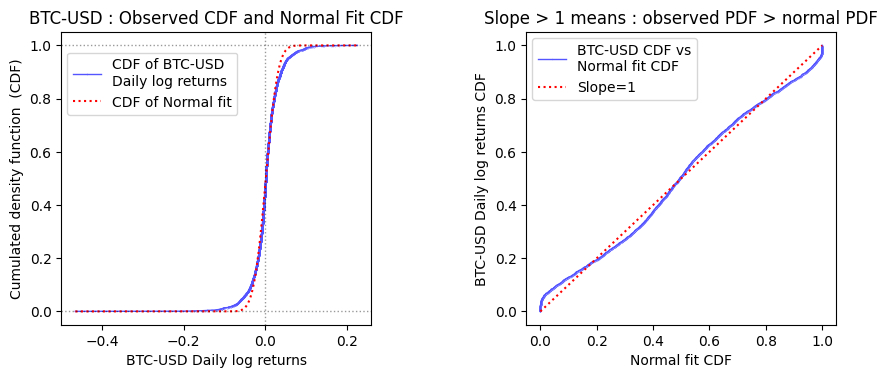

In [93]:
# show/hide code block

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import erf
import pandas as pd


def get_series_cdf(series):
    """
    Calculate CDF (cumulated density function) of a series
    """
    cdf_x_values = np.sort(series.dropna())
    cdf_y_values = np.arange(1, cdf_x_values.size + 1) / cdf_x_values.size

    return cdf_x_values, cdf_y_values


def get_normal_cdf_value(x, mu, sigma): 
    """
    CDF function value of normal distribution with parameters mu, sigma
    """
    return 0.5 * (1.0 + erf((x - mu) / (sigma * np.sqrt(2.0)))) 



def get_cdf_points_for_data_and_normal_fit(series):
    cdfx, cdfy = get_series_cdf(series)  # CDF of series
    popt, pcov = curve_fit(get_normal_cdf_value, cdfx, cdfy)  # fit normal CDF to series
    cdfy_fit = get_normal_cdf_value(cdfx, *popt)  # CDF of the fitted curve
    
    return cdfx, cdfy, cdfy_fit


def plot_cdf_qq(_data={}, period='daily', selected_ticker='BTC-USD'):

    # --- Create a figure. Define a 1 row x 2 columns grid ---
    fig_cdf_qq, [ax_cdf, ax_qq] = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.8))

    # --- CDF of series, and CDF of normal fit ---
    cdfx, cdfy, cdfy_fit = get_cdf_points_for_data_and_normal_fit(_data[selected_ticker][f'{period}_log_return'])

    # --- daily or monthly log return CDF compared to normal fit's CDF ---
    ax_cdf.set_xlabel(f'{selected_ticker} {period.capitalize()} log returns')
    ax_cdf.set_ylabel('Cumulated density function  (CDF)')
    ax_cdf.set_title(f'{selected_ticker} : Observed CDF and Normal Fit CDF')
    ax_cdf.plot(cdfx, cdfy, c='#55f', marker='o', label=f'CDF of {selected_ticker}\n'
                f'{period.capitalize()} log returns', ms=0.1, lw=1, zorder=1)
    ax_cdf.plot(cdfx, cdfy_fit, c='r', ls=':', label='CDF of Normal fit', lw=1.5, zorder=2)
    ax_cdf.legend(bbox_to_anchor=(.02, .93), loc=2, borderaxespad=0.)
    ax_cdf.axhline(0, c='k', ls=':', lw=1, alpha=0.4, zorder=3)
    ax_cdf.axhline(1, c='k', ls=':', lw=1, alpha=0.4, zorder=3)
    ax_cdf.axvline(0, c='k', ls=':', lw=1, alpha=0.4, zorder=3)

    # --- qq plot ---
    ax_qq.plot(cdfy_fit, cdfy, c='#55f', marker='.', ms=0.1, lw=1, label=f'{selected_ticker} CDF vs\nNormal fit CDF')
    ax_qq.plot([0,1], [0,1], 'r:', lw=1.5, label='Slope=1')  # slope=1 for comparison
    ax_qq.set_xlabel('Normal fit CDF')
    ax_qq.set_ylabel(f'{selected_ticker} {period.capitalize()} log returns CDF', zorder=1)
    ax_qq.set_title('Slope > 1 means : observed PDF > normal PDF', zorder=1)
    ax_qq.legend(bbox_to_anchor=(0.02, .98), loc=2, borderaxespad=0.)
    
    # --- finalize the plot ---         
    plt.subplots_adjust(wspace=0.5)
    plt.show()

# --- main ---
plot_cdf_qq(_data=data, period='daily', selected_ticker='BTC-USD')

## Autocorr of log return and abs log return

These plots show autocorrelation vs time difference. 

1. Which daily log return has significantly nonzero autocorrelation ?
2. Which abs daily log return has the highest and lowest autocorrelation after long time ?


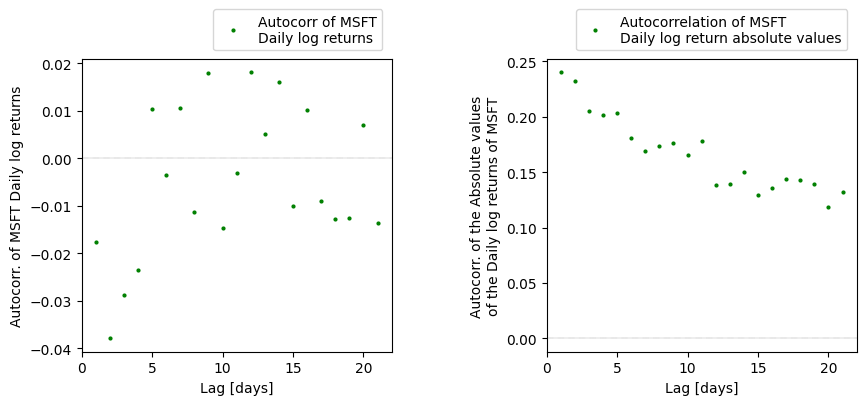

In [94]:
# show/hide code block


def get_autocorr_of_series_and_of_series_abs(series, max_lag):
    """
    return: autocorrelation of the series, autocorrelation of the absolute values in the series
    """
    lags = pd.Series(np.arange(1, max_lag + 1))

    return lags, lags.apply(lambda x: series.autocorr(lag=x)), lags.apply(lambda x: series.abs().autocorr(lag=x))


def plot_autocorr_logreturns(_data={}, period='monthly', max_lag=24, selected_ticker='BTC-USD'):
    """
    Plot autocorrelation of log returns, and autocorrelation of the absolute value of the log returns.
    """
    # --- Create a figure. Define a 1 row x 2 columns grid ---
    fig_autocorr, [ax, ax_abs] = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.8))

    # --- lags applied, autocorr of log return, autocorr of abs. log return ---
    lags, autocorr, autocorr_of_abs = get_autocorr_of_series_and_of_series_abs(
        series=_data[selected_ticker][f'{period}_log_return'], max_lag=max_lag)

    # --- autocorrelation of the series ---
    ax.set_xlabel(f'Lag [{"days" if period == "daily" else "months"}]')
    ax.set_ylabel(f'Autocorr. of {selected_ticker} {period.capitalize()} log returns')
    ax.plot(lags, autocorr, c='g', marker='o', ms=2, lw=0, zorder=1,
            label=f'Autocorr of {selected_ticker}\n{period.capitalize()} log returns')
    ax.legend(bbox_to_anchor=(0.97, 1.03), loc=4, borderaxespad=0.)
    ax.axhline(0, c='k', ls=':', lw=.3, zorder=2)
    ax.axvline(0, c='k', ls=':', lw=.3, zorder=2)

    # --- autocorrelation of the absolute values ---
    ax_abs.set_xlabel(f'Lag [{"days" if period == "daily" else "months"}]')
    ax_abs.set_ylabel(f'Autocorr. of the Absolute values\n'
                      f'of the {period.capitalize()} log returns of {selected_ticker}')
    ax_abs.plot(lags, autocorr_of_abs, c='g', marker='o', ms=2, lw=0, zorder=1,
            label=f'Autocorrelation of {selected_ticker}\n{period.capitalize()} log return absolute values')
    ax_abs.legend(bbox_to_anchor=(0.97, 1.03), loc=4, borderaxespad=0.)
    ax_abs.axhline(0, c='k', ls=':', lw=.3, zorder=2)
    ax_abs.axvline(0, c='k', ls=':', lw=.3, zorder=2)

    # --- finalize the plot ---         
    plt.subplots_adjust(wspace=0.5)
    plt.show()


# --- main --- set variables: period, max_lag, selected_ticker ---
plot_autocorr_logreturns(_data=data, period='daily', max_lag=21, selected_ticker='MSFT')

## Volume vs log Return

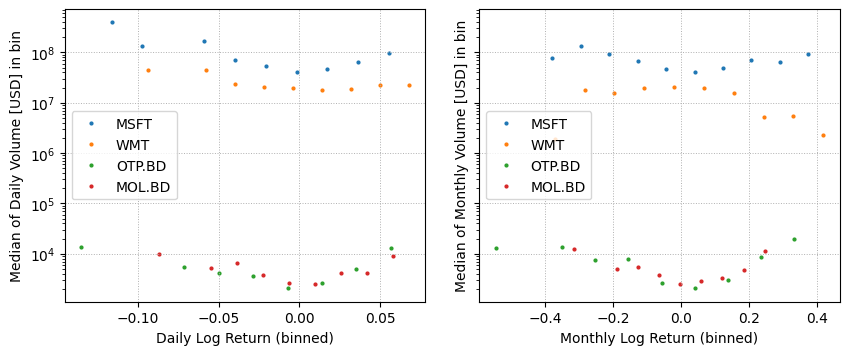

In [103]:
# show/hide code block

from scipy.stats import binned_statistic


def plot_volume_vs_log_return(_data, selected_tickers):

    # --- Create a figure. Define a 1 row x 2 columns grid (daily, monthly) ---
    fig_volume_logreturn, [ax_d, ax_m] = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 3.8))

    # --- Left subplot: daily volume vs daily log return ---
    for ticker in selected_tickers:
        dat = _data[ticker].dropna()

        bin_medians, bin_edges, _ = binned_statistic(dat.daily_log_return, dat.Volume, statistic='median')
        bin_width = (bin_edges[1] - bin_edges[0])
        bin_centers = bin_edges[1:] - bin_width/2

        ax_d.plot(bin_centers, bin_medians, marker='o', ms=2, lw=0, label=ticker, zorder=1)
        ax_d.set_yscale('log')

    ax_d.grid(linestyle=':', linewidth=0.7, zorder=1)
    ax_d.set(xlabel='Daily Log Return (binned)', ylabel='Median of Daily Volume [USD] in bin')
    ax_d.legend(loc='center left')

    # --- Right subplot: monthly volume vs monthly log return ---
    for ticker in selected_tickers:
        dat = _data[ticker].dropna()

        bin_medians, bin_edges, _ = binned_statistic(dat.monthly_log_return, dat.Volume, statistic='median')
        bin_width = (bin_edges[1] - bin_edges[0])
        bin_centers = bin_edges[1:] - bin_width/2

        ax_m.plot(bin_centers, bin_medians, marker='o', ms=2, lw=0, label=ticker, zorder=1)
        ax_m.set_yscale('log')

    ax_m.grid(linestyle=':', linewidth=0.7, zorder=1)
    ax_m.set(xlabel='Monthly Log Return (binned)', ylabel='Median of Monthly Volume [USD] in bin')
    ax_m.legend(loc='center left')

    # --- finalize the plot ---         
    plt.subplots_adjust(wspace=0.15)
    plt.show()


plot_volume_vs_log_return(_data=data, selected_tickers=['MSFT', 'WMT', 'OTP.BD', 'MOL.BD'])

## Volume vs Volatility of daily close

<span style="background-color:yellow;color:red;font-weight:bold">TODO: (1) questions for each figure, (2) continue plot updates here</span>

1. Based on the below scatter plot what do you conclude for the relationship between daily log(volume) and log(volatility) ?
2. Based on the roughly even distribution of the daily points in the plot what is your chance of having a high volume day ?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

PAR['volume_vs_volatility'] = {
    'bse_codes': BSE_CODES,
    'bse_colors': BSE_COLORS,
    'markersize': 4,
    'marker': 'o',
    'fontsize': 14,
    'ticks_fontsize': 13,
    'xtics': [10, 100, 1000],
    'ytics': [0.1, 1, 10],
    'selected_code': None,  # if None, then all are plotted
    'figsize_inches': [8, 6]
}


def calculate_bse_monthly_volatility_and_average_traded_volume(data=None):
    '''
    For the BSE (Budapest Stock Exchange) data sets:
    for each month calculate the volatility of the daily close and the average daily traded volume.    
    '''
    monthly_data = pd.DataFrame(columns=['volatility', 'average_volume'])
    dates = data.index
    yearly_dates = dates.groupby(dates.year)
    for year in yearly_dates.keys():
        monthly_dates = pd.DatetimeIndex(yearly_dates[year]).groupby(pd.DatetimeIndex(yearly_dates[year]).month)
        for month in monthly_dates.keys():
            date_all = monthly_dates[month]
            date_first = min(date_all)
            close_daily_all = [data.loc[date]['Close price'] for date in date_all]
            volume_daily_all = [data.loc[date]['Volume (HUF value)'] for date in date_all]
            volatility = np.std(close_daily_all)
            volume_daily_average = np.average(volume_daily_all)
            monthly_data.loc[date_first] = [volatility, volume_daily_average]

    return monthly_data


def plot_bse_volume_vs_volatility(par=None, df=None):
    """
    For the BSE (Budapest Stock Exchange) data sets:
    plot the monthly volatilty vs avg daily volume of the month.
    """
    
    monthly_data = {}
    for code, color in zip(par['bse_codes'], par['bse_colors']):
        if par['selected_code'] is None or code == par['selected_code']:
            monthly_data[code] = calculate_bse_monthly_volatility_and_average_traded_volume(data=df[code])
            plt.plot(monthly_data[code]['volatility'], monthly_data[code]['average_volume'] / 1e+9,
                     c=color, marker=par['marker'], label=code, lw=0, markersize=par['markersize'])
    plt.legend(bbox_to_anchor=(.92, .08), loc=4, borderaxespad=0., fontsize=par['fontsize'])
    plt.title('Monthly data: Average daily volume vs Volatility of daily close', fontsize=par['fontsize'])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Volatility of daily close in a month (HUF)', fontsize=par['fontsize'])
    plt.ylabel('Average daily volume in a month (billion HUF)', fontsize=par['fontsize'])
    plt.xticks(par['xtics'], [f'{xtic:g}' for xtic in par['xtics']])
    plt.yticks(par['ytics'], [f'{ytic:g}' for ytic in par['ytics']])

    set_ticks_fontsize(plt=plt, fontsize=par['ticks_fontsize'])
    fig = plt.gcf()
    fig.set_size_inches(par['figsize_inches'])
    plt.show()


df, _ = read_and_prepare_data(par=PAR['returns'], par_read=PAR['read'])
plot_bse_volume_vs_volatility(par=PAR['volume_vs_volatility'], df=df)

## Skewness of log returns distribution 

1. What does the sum of the highest and the lowest value tell about a distribution ?
2. Does the negative skew of SP500 mean that stock prices respond faster to negative news than to positive news ?


| Name | Symbol and Calculation |
|:-----|:------------|
| Random variable | $X$ |
| Mean | $\mu = E\left[ \,X \,\right]$ |
| Variance | ${\displaystyle \sigma^{\,2} = E\left[ \, \left( \, X - \mu \, \right)^{\,2} \, \right] }$ |
| Volatility = Std.dev. | $\sigma$ |
| Skewness | ${\displaystyle E\left[\,\left(\frac{X-\mu}{\sigma}\,\right)^{\,3} \, \right]}$|

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from os.path import join

PAR['skewness'] = {
    # select data sets to be analyzed and set their display names
    'fred_selected_codes': {
        'GOLDPMGBD228NLBM': 'GOLD',
        'DEXJPUS':'JPYUSD', 
        'ICERATES1500USD1Y': 'US1YSW',
        'SP500': 'SP500',
        'WILLRESIPR': 'WILLSH'
    },
    'data_dir': 'data'
}


def read_fred_selected(par=None):
    """
    Read FRED data sets without the lines containing a dot instead of data
    Calculate also the log returns
    """
    df = {}

    for code in par['fred_selected_codes']:
        df[code] = pd.read_csv(join(par['data_dir'], code + '.csv'), na_values=['.'])
        df[code].dropna(inplace=True)
        df[code]['LogReturn'] = np.log(df[code][code]) - np.log(df[code][code]).shift()
        
    return df


def get_skewness(par=None, df=None):
    """
    For the selected FRED data sets write their skewness to stdout and plot differences among the skewnesses
    """

    df_out = pd.DataFrame(columns=['Skew', 'First+Last', 'Name'])
    
    for index, code in enumerate(par['fred_selected_codes']):
        log_returns = df[code]['LogReturn'].dropna()
        sorted_log_returns = pd.Series.sort_values(log_returns).tolist()  # sort into ascending order

        df_out.loc[index] = [
            f'{stats.skew(sorted_log_returns):+.2f}',
            f'{sorted_log_returns[0] + sorted_log_returns[-1]:+.3f}',
            par['fred_selected_codes'][code]
        ]

    df_out.set_index('Name', inplace=True)    
    return df_out

        
df = read_fred_selected(par=PAR['skewness'])
df_out = get_skewness(par=PAR['skewness'], df=df)
display(df_out)

## Task: yearly mean of daily log returns and yearly volatility
For each year separately, calculate (1) the mean of the daily log return of WMT, and (2) the volatility of the daily log returns of WMT.

###### Answer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

PAR['mean_vol'] = {
    'fontsize': 12,
    'data_dir': 'data',
    'selected_data_set': 'WMT',
    'figure_size': (9, 6)
}


def yearly_mean_and_vol_of_daily_log_return(par=None):
    
    # data processing
    df = pd.read_csv(join(par['data_dir'], par['selected_data_set'] + '.csv'))
    df['Year'] = pd.to_datetime(df.Date).dt.year
    df['LogReturnDaily'] = np.log(df['Close']) - np.log(df['Close'].shift())
    daily_log_ret_yearly_mean = df.groupby(df.Year).LogReturnDaily.agg('mean')
    daily_log_ret_vol = df.groupby(df.Year).LogReturnDaily.agg('std')

    # plotting
    fig, axes = plt.subplots(figsize=par['figure_size'])
    plt.plot(daily_log_ret_yearly_mean, markersize=10, marker='.', linestyle=':', linewidth=1, color='g')
    plt.plot(daily_log_ret_vol, markersize=10, marker='.', linestyle=':', linewidth=1, color='b')
    plt.title(f'Yearly mean (green) and volatility (blue) of the daily log returns of ' + par['selected_data_set'],
              fontsize=par['fontsize'])
    plt.xlabel('Y e a r', fontsize=par['fontsize'])
    plt.ylabel('Daily log returns: avg. and std.dev', fontsize=par['fontsize'])
    plt.axhline(0, c='k', ls=':', lw=.3)
    plt.show()

    # investigate the average returns in sorted order
    print('Yearly mean of daily log returns in sorted order\n')
    display(daily_log_ret_yearly_mean.sort_values())


yearly_mean_and_vol_of_daily_log_return(par=PAR['mean_vol'])